# <center>ĐỒ ÁN CUỐI KÌ: LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</center>

| MSSV     | Họ và tên       | Github    |
|----------|-----------------|-----------|
| 1712575  | Hoàng Xuân Long | dralong10 |
| 19120539 | Vương Thế Khang | vt-khang  |

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## A. THU THẬP DỮ LIỆU

Bộ dữ liệu mà nhóm chọn là bộ dữ liệu về các bộ phim hay TV shows được thu thập từ nền tảng phát video và truyền thông phổ biến nhất **Netflix**. \
Theo như mô tả về bộ dữ liệu:
> This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. \
> Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Có vẻ như bộ dữ liệu này thu thập các bộ phim và TV shows từ giữa năm 2021 trở về trước và lần cập nhật gần đây nhất của bộ dữ liệu là **27/09/2021 (Version 5)** nên ta có thể tin tưởng về độ chính xác của bộ dữ liệu và các kết quả thống kê. Ngoài ra bộ dữ liệu trên được thu thập từ Flixable - công cụ tìm kiếm bên thứ ba của Netflix.

Các file dữ liệu này bao gồm:
- File "netflix_titles.csv": bộ dữ liệu được thu thập từ [Kaggle](https://www.kaggle.com/shivamb/netflix-shows)
- File "description.txt": mô tả ý nghĩa của các cột (file tự tạo theo mô tả các cột thuộc tính của bộ dữ liệu)

Người thu thập dữ liệu: Shivam Bansai [@shivamb](https://www.kaggle.com/shivamb) \
License: [**CC0 1.0 Universal (CC0 1.0) Public Domain Dedication**](https://creativecommons.org/publicdomain/zero/1.0/)
>The person who associated a work with this deed has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law. You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

Đầu tiên, ta sẽ xem thử bộ dữ liệu trông như thế nào nhé. Đọc dữ liệu từ file "netflix_titles.csv" và lưu vào dataframe `netflix_df`.

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


## B. KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
netflix_df.shape

(8807, 12)

Vậy dữ liệu có kích thước **8807 dòng x 11 cột**

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin về một bộ phim, có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Kiểm tra xem dữ liệu có các dòng bị lặp không và lưu kết quả vào biến `have_duplicated_row`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [4]:
have_duplicated_row = all(netflix_df.duplicated())
have_duplicated_row

False

Như vậy, không có dòng nào bị lặp lại.

### Mỗi cột có ý nghĩa gì?

Xem file "description.txt"

In [5]:
col_name, col_meaning = [], []
with open('description.txt', 'r') as f:
    for line in f.readlines():
        col_name.append(line.strip().split('\t')[0])
        col_meaning.append(line.strip().split('\t')[1])
description_df = pd.DataFrame({'Column': col_name,
                              'Meaning': col_meaning}).set_index('Column')
description_df

,Meaning
Column,
show_id,Unique ID for every Movie / Tv Show
type,Identifier - A Movie or TV Show
title,Title of the Movie / Tv Show
director,Director of the Movie
cast,Actors involved in the movie / show
country,Country where the movie / show was produced
data_added,Date it was added on Netflix
release_year,Actual Release year of the movie / show
rating,TV Rating of the movie / show


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Xem thử kiểu dữ liệu của các cột dữ liệu

In [6]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Như vậy có thể thấy:
- Cột "date_added" đang có kiểu dữ liệu `object`. Ta cần đưa cột này về dạng `datetime`.
- Cột "cast" và "listed_in" chứa các giá trị liệt kê, do đó ta sẽ đưa cột này về dạng `list`.

Ta sẽ làm điều này ở bước tiền xử lý dữ liệu.

---

## Tiền xử lý

Thay đổi kiểu dữ liệu của cột "date_added" sang kiểu dữ liệu dạng `datetime`.

In [7]:
netflix_df['date_added'] = netflix_df['date_added'].astype('datetime64')

Thay đổi kiểu dữ liệu của cột "cast" và "listed_in" sang kiểu dữ liệu dạng `list`. Do trong 2 cột này có các giá trị NaN, nên khi chuyển về dạng `list` sẽ bị lỗi. Do đó trước khi thay đổi kiểu dữ liệu, ta sẽ thay các giá trị NaN của 2 cột này thành "" (chuỗi rỗng).

In [8]:
netflix_df['cast'] = netflix_df['cast'].replace(np.nan, '').str.split(',')
netflix_df['listed_in'] = netflix_df['listed_in'].replace(np.nan, '').str.split(',')

Xem thử kiểu dữ liệu của các cột dữ liệu sau khi tiền xử lý.

In [9]:
netflix_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

---

Có vẻ các cột đều có kiểu dữ liệu phù hợp. Nếu trong quá trình phân tích dữ liệu cần phải thay đổi kiểu dữ liệu của các cột thì ta sẽ quay lại tiền xử lý ở đây, tạm thời ta chấp nhận kiểu dữ liệu hiện tại của các cột.

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ta sẽ xếp các cột có kiểu dữ liệu `datetime` vào nhóm numerical. Như vậy, chỉ có 2 cột numeric là "date_added" và "release_year".

Với mỗi cột numerical, ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), giá trị nhỏ nhất (min) và giá trị lớn nhất (max). Sau đó ta sẽ lưu 3 giá trị này vào dataframe `nume_col_df` thành 3 dòng là "ratio_missing_val", "min", "max".

In [10]:
def ratio_missing_val(s):
    return s.isnull().mean()*100

nume_col_df = netflix_df[['date_added','release_year']].agg([ratio_missing_val, min, max])
nume_col_df

,date_added,release_year
ratio_missing_val,0.113546,0.0
min,2008-01-01 00:00:00,1925.0
max,2021-09-25 00:00:00,2021.0


Min và max của các cột có vẻ không có gì bất thường.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Có 8 cột categorical là "show_id", "type", "little", "director", "country", "rating", "duration", "description".

Với mỗi cột categorical, ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng các giá trị khác nhau (không xét giá trị NaN) và danh sách các giá trị khác nhau (không xét giá trị NaN). Sau đó ta sẽ lưu 3 giá trị này vào dataframe `cate_col_df` thành 3 dòng là "ratio_missing_val", "num_diff_vals", "diff_vals".

In [11]:
def ratio_missing_val(s):
    return s.isna().mean()*100
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.dropna().unique()

cate_col_df = netflix_df[['show_id','type','title','director','country','rating','duration','description']].agg([ratio_missing_val, num_diff_vals, diff_vals])
cate_col_df

,show_id,type,title,director,country,rating,duration,description
ratio_missing_val,0.0,0.0,0.0,29.908028,9.435676,0.045418,0.034064,0.0
num_diff_vals,8807,2,8807,4528,748,17,220,8775
diff_vals,"[s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...","[Movie, TV Show]","[Dick Johnson Is Dead, Blood & Water, Gangland...","[Kirsten Johnson, Julien Leclercq, Mike Flanag...","[United States, South Africa, India, United St...","[PG-13, TV-MA, PG, TV-14, TV-PG, TV-Y, TV-Y7, ...","[90 min, 2 Seasons, 1 Season, 91 min, 125 min,...","[As her father nears the end of his life, film..."


Hầu hết các cột dạng phân loại không có gì bất thường. Ngoại trừ cột "director" có tỉ lệ % giá trị thiếu khá cao **(~29.9%)** so với các cột khác, vì thế ta sẽ tránh dùng cột này trong bước Phân tích dữ liệu để kết quả phân tích được chính xác và tin cậy hơn.

## C. ĐẶT CÂU HỎI

### Câu 1: Top 5 diễn viên hoạt động nhiều nhất qua từng năm
### Câu 2: Xu hướng làm phim của Netflix hướng tới đối tượng nào qua từng năm
### Câu 3: So sánh giữa TV Show và Movie qua từng năm
### Câu 4: Phân bố về thời lượng của các phim trên Netflix

## D. PHÂN TÍCH DỮ LIỆU

### Câu 1: Top 5 diễn viên hoạt động nhiều nhất qua từng năm

**Câu hỏi có ý nghĩa như thế nào?**

Trả lời câu hỏi cho chúng ta biết được 5 diễn viên đóng nhiều phim nhất qua từng năm và đánh giá xem có sự thay đổi của các diễn viên qua các năm hay không.

**Các bước thực hiện:**

Lấy thuộc tính diễn viên qua từng năm, đếm số lượng và sắp xếp theo chiều giảm dần.

**Lấy thuộc tính diễn viên qua từng năm, đếm số lượng và sắp xếp theo chiều giảm dần**

Hàm `col_cast_release_year` nhận giá trị đầu vào là năm (`year`) và số lượng top (mặc định là `top=5`) và trả về top 5 các diễn viên ứng với năm đó. Sau đó dùng hàm trên tạo 1 dataframe `top5_cast_df` có 5 cột dữ liệu là "Top1", "Top2", "Top3", "Top4", "Top5", mỗi dòng là tên của các diễn viên xếp hạng theo top 5, nếu không có diễn viên nào trong xếp hạng đó thì được gán thành `None`. Kết quả cho ra bảng dữ liệu sau:

In [12]:
pd.set_option('display.max_rows', 999)

In [13]:
def col_cast_release_year(year, top=5):
    return netflix_df[netflix_df['release_year'] == year]['cast'].explode().replace('', np.nan).dropna().value_counts()[:top].index
year = np.sort(netflix_df['release_year'].unique())
list_top5_cast = list(map(col_cast_release_year, year))
top5_cast_df = pd.DataFrame(list_top5_cast, columns = ['Top1','Top2','Top3','Top4','Top5'], index = year)
top5_cast_df

,Top1,Top2,Top3,Top4,Top5
1925,None,None,None,None,None
1942,Henry Fonda,Jane Darwell,None,None,None
1943,None,None,None,None,None
1944,Burgess Meredith,None,None,None,None
1945,Walter Huston,Dana Andrews,None,None,None
1946,Walter Huston,None,None,None,None
1947,James Stewart,Lloyd Bridges,None,None,None
1954,Zaki Rostom,Vera-Ellen,Bing Crosby,John Brascia,Rosemary Clooney
1955,Tina Pica,Virgilio Riento,Vittorio De Sica,Franco Fantasia,Lina Gennari
1956,Faten Hamama,Aziza Helmy,Hussein Riad,Jack Kelly,Tawfik El Deken


In [14]:
pd.reset_option('display.max_rows')

Nhận xét: Đa số không có gì bất thường ở xếp hạng top 5 các diễn viên theo từng năm, riêng năm 1925 và 1943 không có diễn viên nào nằm trong bảng xếp hạng.

### Câu 2: Xu hướng làm phim của Netflix hướng tới đối tượng nào qua từng năm

**Câu hỏi có ý nghĩa như thế nào?**

Trả lời câu hỏi cho chúng ta biết được thể loại phim mà netflix làm nhiều nhất qua từng năm và đánh xem giá thể loại phim nào mà họ đang hướng đến.

**Các bước thực hiện:**
- Rút trích các thể loại phim theo thuộc tính rating và giải thích ý nghĩa.
- Thống kê thể loại phim chiếm nhiều nhất của các phim theo năm ứng với phim được release vào năm đó.

**Rút trích các thể loại phim theo thuộc tính rating và giải thích ý nghĩa**

Dùng lại dataframe `cate_col_df` ở trên để lấy ra các thể loại phim theo thuộc tính rating.

In [15]:
pd.DataFrame({'rating': cate_col_df['rating']['diff_vals']})

,rating
0,PG-13
1,TV-MA
2,PG
3,TV-14
4,TV-PG
5,TV-Y
6,TV-Y7
7,R
8,TV-G
9,G


Ý nghĩa của các cụm từ viết tắt cho rating phim:
- **G, TV-G** (General Audiences) – Phim dành cho mọi lứa tuổi.
Mọi người đều có thể xem.
Không có hình ảnh khỏa thân, không có cảnh (hoặc dấu hiệu khác như âm thanh, ngôn ngữ...) liên quan đến tình dục, sử dụng chất kích thích (gồm rượu bia, thuốc lá, ma túy...). Bạo lực và các lời lẽ thô tục hầu như không có.
- **PG, TV-PG, TV-Y7-FV, TV-Y7, TV-Y** (Parental Guidance Suggested) – Phim có thể có một số chi tiết (hình ảnh, từ ngữ) không phù hợp với trẻ nhỏ. Bố mẹ cần cân nhắc khi cho con cái xem phim.
Một số hình ảnh có thể không thích hợp cho trẻ em.
Không có cảnh khỏa thân, các cảnh (hoặc dấu hiệu khác như âm thanh, ngôn ngữ...) liên quan đến tình dục rất ít, cảnh sử dụng chất kích thích nhẹ nhàng (như thuốc lá, rượu) rất ít và chỉ thoáng qua. Bạo lực và lời lẽ tục tĩu rất ít. Phân loại này không ghi rõ độ tuổi có thể xem song thông thường chỉ có trẻ 9 tuổi trở lên mới có thể được xem phim thuộc nhãn phân loại này mà thôi.
- **PG-13, TV-14, TV-MA, NR, UR** (Parents Strongly Cautioned) – Phim có một số chi tiết không phù hợp với trẻ dưới 13 tuổi.
Một số hình ảnh không thích hợp cho trẻ em dưới 13 tuổi.
Phim có thể có các lời tục tĩu (chửi thề) ở mức nhẹ ("stupid", "idiot"...), các cảnh liên quan đến tình dục chỉ ở mức nhẹ (ví dụ như ôm hôn), có cảnh khỏa thân dù không rõ ràng (ví dụ như cảnh nam nữ vuốt ve nhau trên giường và được đắp ngoài bởi một tấm chăn), có cảnh bạo lực ở mức thấp (đánh lộn, gây hấn nhưng không làm ai bị thương nặng) và/hoặc sử dụng chất kích thích nhẹ như thuốc lá, rượu.
- **R** (Restricted) – Thanh thiếu niên dưới 17 tuổi không được xem phim nếu không có sự đồng ý của người lớn.
Không dành cho người dưới 17 tuổi mà không có cha mẹ hoặc người giám hộ đi cùng do có thể gây hoảng loạn hoặc ảnh hưởng xấu đến tư duy, đạo đức của trẻ em.
Có các lời tục tĩu, dâm dục ở mức vừa (ví dụ như chửi thề với từ "shit", "damn"...), có những cảnh liên quan đến tình dục ở mức vừa (không đặc tả quan hệ tình dục và chỉ ngắn hơn 3 giây), có cảnh khỏa thân nhưng không rõ ràng và không lộ ra những bộ phận nhạy cảm, các cơ quan sinh dục ngoài như mông, vú, âm vật, lông mu...
Có cảnh bạo lực ở mức cao (sát nhân, bắn súng, đâm dao) nhưng không mô tả chi tiết xác chết, vết thương hoặc máu me; có cảnh sử dụng các chất kích thích bị cấm như ma túy, cần sa... nhưng ở mức thời lượng ngắn và không đặc tả.
Mức này ở nhiều nước khác (nhất là các nước châu Á) sẽ bị xếp ở hạng "cấm trẻ em dưới 18 tuổi", đồng thời phải cắt bớt một số hình ảnh, nội dung không phù hợp với văn hóa bản địa. Ví dụ như phim điện ảnh Sex and the City ở Mỹ được dán nhãn R, nhưng khi chiếu ở Singapore thì bị xếp ở mức "cấm trẻ em dưới 18 tuổi", đồng thời phải cắt bỏ hết các cảnh khỏa thân, lộ ngực hay văng tục do "không phù hợp với văn hóa của người Hoa, người Mã Lai và người Ấn" (3 dân tộc chính của Singapore).
- **NC-17** (No One 17 and Under Admitted) – Phim hoàn toàn không dành cho khán giả dưới 17 tuổi, do có nhiều yếu tố gây ảnh hưởng xấu đến nhân cách, đạo đức, khuyến khích hành vi phạm tội.
Có cảnh, lời lẽ tục tĩu, dâm dục ở mức cao (ví dụ như chửi thề với từ "fuck", "asshole"...), có những cảnh liên quan đến tình dục ở mức cao (mô tả rõ ràng cảnh quan hệ tình dục hoặc cảnh quay kéo dài hơn 3 giây), có những cảnh khỏa thân rõ ràng (quay từ phía trước hoặc lộ ra các cơ quan sinh dục ngoài như mông, vú, âm vật, lông mu...), đặc tả bạo lực ở mức ghê gớm (bạo dâm, tra tấn, sát nhân hàng loạt, kinh dị, cảnh máu me vung vãi, tội phạm chia phe chém giết nhau...), đặc tả chi tiết cảnh sử dụng các chất kích thích bị cấm (ma túy, cần sa) trong phim. Có các yếu tố gây tranh cãi, nội dung đả kích, châm biếm, xúc phạm... liên quan đến lịch sử, tôn giáo, dân tộc.
Mức này ở rất nhiều nước khác (ngoài Mỹ), đặc biệt ở châu Á thì sẽ bị xếp là phim cấm trình chiếu.

Đối với các thể loại được chia theo phút (**74 min, 84 min, 66 min**) có thể không liên quan tới đối tượng người xem mà liên quan tới thời lượng trung bình của phim, điều này sẽ được làm rõ hơn ở câu 4, tạm thời ta sẽ tiếp tục bước kế tiếp.

**Thống kê thể loại phim chiếm nhiều nhất của các phim theo năm ứng với phim được release vào năm đó**


Hàm `col_rating_release_year` nhận giá trị đầu vào là năm (`year`) và trả về thể loại phim chiếm nhiều nhất. Sau đó dùng hàm trên tạo 1 dataframe `top1_rating_df` có 5 cột dữ liệu là "Trending", mỗi dòng là tên của thể loại phim chiếm nhiều nhất theo từng năm. Kết quả cho ra bảng dữ liệu sau:

In [16]:
pd.set_option('display.max_columns', 999)

In [17]:
def col_rating_release_year(year):
    return netflix_df[netflix_df['release_year'] == year].loc[:,'rating'].value_counts()[:1].index
list_top1_rating = list(map(col_rating_release_year,year))
top1_rating_df = pd.DataFrame(list_top1_rating, columns = ['Trending'], index = year)
top1_rating_df.T

,1925,1942,1943,1944,1945,1946,1947,1954,1955,1956,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Trending,TV-14,TV-14,TV-PG,TV-14,TV-MA,TV-PG,TV-PG,TV-G,TV-PG,G,NR,TV-14,TV-PG,TV-14,TV-PG,TV-MA,G,TV-14,TV-PG,R,G,TV-PG,TV-PG,G,TV-MA,R,R,PG,PG,TV-PG,PG,TV-14,R,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,R,TV-PG,TV-14,TV-14,TV-MA,R,R,TV-14,PG-13,R,R,R,R,PG-13,R,PG-13,R,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA


In [18]:
pd.reset_option('display.max_columns')

Nhận xét: Netflix có xu hướng làm thể loại phim có nội dung thiết kế dành riêng cho người lớn, không phù hợp với trẻ em hay thiếu niên. Lý do có thể vì đây là nền tảng stream phim trực tuyến có trả phí và đa số là khách hàng ở độ tuổi trưởng thành đã có công việc làm, vây nên Netflix hướng đến đối tượng đó

### Câu 3: So sánh giữa TV Show và Movie qua từng năm

**Câu hỏi có ý nghĩa như thế nào?**

Trả lời câu hỏi sẽ cho ta biết được trong mỗi năm Netflix tập trung vào mảng TV Show hay Movie nhiều hơn, đồng thời có thể đánh giá mảng nào được Netflix đang phát triển nhiều hơn và lí do của việc đó.

**Các bước thực hiện:**
- Rút trích số lượng TV Show và Movie dựa vào thuộc tính `type` theo từng năm và lưu vào dataframe.
- Xem phân bố của dữ liệu.
- Trực quan hóa bằng đồ thị cột đôi.

**Tính số lượng TV Show và Movie theo từng năm**

Hàm `col_type_release_year` nhận giá trị đầu vào là năm (`year`) và trả về số lượng TV Show và Movie ứng với năm đó. Sau đó dùng hàm trên tạo 1 dataframe `type_film_df` có 2 cột dữ liệu là "TV Show" và "Movie", mỗi dòng là số lượng TV Show và Movie theo từng năm. Đối với năm không có TV Show hoặc Movie thì số lượng TV Show hoặc Movie của năm đó là 0. Ngoài ra, ta tạo thêm cột "Film" (bao gồm TV Show và Movie) là tổng số lượng TV Show và Movie theo từng năm. Kết quả cho ra bảng dữ liệu sau:

In [19]:
def col_type_release_year(year):
    return netflix_df[netflix_df['release_year'] == year]['type'].value_counts().sort_index()
list_type = list(map(col_type_release_year, year))
type_film_df = pd.DataFrame(list_type, index = year).replace(np.nan, 0).astype(int)
type_film_df['Film'] = type_film_df['TV Show'] + type_film_df['Movie']
type_film_df

,TV Show,Movie,Film
1925,1,0,1
1942,0,2,2
1943,0,3,3
1944,0,3,3
1945,1,3,4
...,...,...,...
2017,265,767,1032
2018,380,767,1147
2019,397,633,1030
2020,436,517,953


**Xem phân bố của dữ liệu**

Ta sẽ tính xem 
- Năm có ít TV Show nhất.
- Năm có nhiều TV Show nhất.
- Năm có ít Movie nhất.
- Năm có nhiều Movie nhất.
- Năm có số lượng phim (bao gồm TV Show và Movie) ít nhất.
- Năm có số lượng phim (bao gồm TV Show và Movie) nhiều nhất.

Sau đó lưu các giá trị này vào dataframe `type_film_distribution_df` thành 3 dòng là "num", "num_year", "years".

In [20]:
def less_col(col):
    x = type_film_df.loc[type_film_df[col] == type_film_df[col].min()].index
    return [type_film_df[col].min(), len(x), list(x)]
def most_col(col):
    x = type_film_df.loc[type_film_df[col] == type_film_df[col].max()].index
    return [type_film_df[col].max(), len(x), list(x)]

type_film_distribution_df = pd.DataFrame({'less_TV_show': less_col('TV Show'),
                                         'most_TV_show': most_col('TV Show'),
                                         'less_movie': less_col('Movie'),
                                         'most_movie': most_col('Movie'),
                                         'less_film': less_col('Film'),
                                         'most_film': most_col('Film')}, index=['num','num_year','years'])
type_film_distribution_df

,less_TV_show,most_TV_show,less_movie,most_movie,less_film,most_film
num,0,436,0,767,1,1147
num_year,28,1,1,2,5,1
years,"[1942, 1943, 1944, 1947, 1954, 1955, 1956, 195...",[2020],[1925],"[2017, 2018]","[1925, 1947, 1959, 1961, 1966]",[2018]


Nhận xét: 
- Các năm thuộc thế kỉ XX (1999 trở về trước) hầu hết trên Netflix vẫn chưa có TV Show.
- Trong 5 năm gần đây (2017, 2018, 2019, 2020, 2021) có nhiều TV Show và Movie.

Nhìn chung vẫn chưa thể hiện được nhiều, do vậy ta cần phải trực quan hóa dữ liệu để có cái nhìn tổng quát hơn.

**Trực quan hóa bằng đồ thị cột đôi**

Ta sẽ dùng đồ thị cột đôi để thể hiện số lượng TV Show (màu xanh) và Movie (màu cam) qua từng năm. Trong đó:
- Trục tung thể hiện giá trị số lượng của TV Show và Movie.
- Trục hoành thể hiện các năm.

<AxesSubplot:>

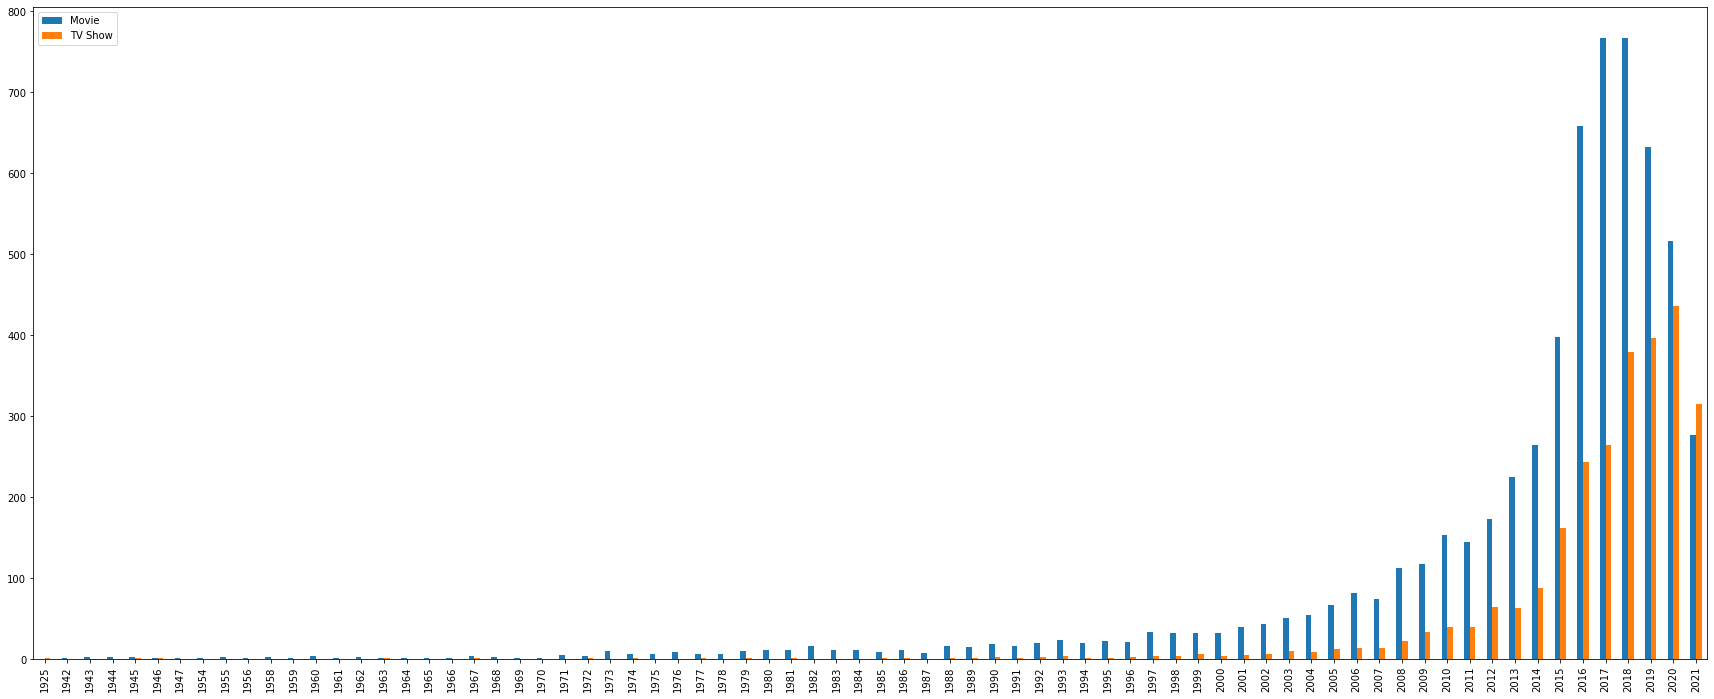

In [21]:
visual_type_film_df = pd.DataFrame({'Movie': type_film_df['Movie'], 'TV Show': type_film_df['TV Show']})
visual_type_film_df.sort_index().plot.bar(figsize = (30, 12))

Nhận xét:
- Theo thời gian các năm tăng dần, số lượng Movie trên Netflix ngày càng tăng, đỉnh cao là năm 2017 và năm 2018 có số lượng Movie trên Netflix cao nhất. Số lượng TV Show cũng tăng nhưng luôn ít hơn số lượng Movie.
- Tuy nhiên, trong 3 năm gần đây (2019, 2020, 2021), sự chênh lệch giữa số lượng Movie và TV Show ngày càng giảm, năm 2021 là năm đầu tiên ghi nhận số lượng TV Show nhiều hơn số lượng Movie, cũng từ năm 2019, số lượng Movie trên nền tảng này cũng ngày càng giảm.

Cuối năm 2019 cũng là năm bắt nguồn của dịch bệnh [Covid-19](https://vi.wikipedia.org/wiki/%C4%90%E1%BA%A1i_d%E1%BB%8Bch_COVID-19). Theo như suy đoán của nhóm, có thể từ đây trở về sau, đa số mọi người đều ở nhà nhiều, nên các nhà làm phim tận dụng cơ hội hướng tới việc làm TV Show để có thể đạt được lợi thế về doanh thu (do TV Show chia ra thành nhiều Seri và nhiều Season sẽ đạt được ngưỡng người xem tổng cộng cao) hơn là 1 bộ phim Movie chỉ được doanh thu ở mỗi bộ phim Movie đó (làm Movie chỉ tính như 1 tập trong TV Show). Ngoài ra, chi phí để làm một bộ phim Movie sẽ cao hơn chi phí để làm TV Show, có thể thấy gần đây cũng có rất nhiều Movie chiếu ngoài rạp được phát trực tuyến trên nền tảng xem phim như Netflix, các nhà làm phim luôn mong muốn tối đa hóa lợi nhuận cho họ, nên trước đây và bây giờ có sự chênh lệch giữa TV Show và Movie cũng là điều dễ hiểu. 

### Câu 4: Phân bố về thời lượng của các phim trên Netflix

**Câu hỏi có ý nghĩa như thế nào?**

Trả lời câu hỏi sẽ cho ta biết được thời lượng chủ yếu nên dành cho một Movie hay số mùa làm TV Show, từ đó rút ra kết luận về phân bố thời lượng các phim trên Netflix cho hợp lý.

**Các bước thực hiện:**
- Rút trích và phân loại phim theo thời lượng.
- Chia thời lượng phim thành 2 loại: Minute (dành cho Movie) và Season (dành cho TV Show).
- Trực quan hóa bằng đồ thị cột thể hiện phân bố về thời lượng của 2 loại trên.

**Rút trích và phân loại phim theo thời lượng**

Thống kê số lượng các phim theo từng thời lượng trong `netflix_df`. Sau đó lưu các giá trị này vào dataframe `duration_film_df`.

In [22]:
duration_film_df = pd.DataFrame(netflix_df['duration'].value_counts().sort_index())
duration_film_df

,duration
1 Season,1793
10 Seasons,7
10 min,1
100 min,108
101 min,116
...,...
95 min,137
96 min,130
97 min,146
98 min,120


Nhận xét: Ta thấy thời lượng phim được tính bằng 2 đơn vị: "min" và "Season". Nếu để ý kĩ từ tập dữ liệu thu thập ban đầu, các phim trên Netflix có `type` là "TV Show" sẽ tính thời lượng phim bằng đơn vị "Season", còn các phim có `type` là "Movie" sẽ tính thời lượng phim bằng đơn vị "min".

Do vậy, ta sẽ chia thời lượng thành 2 loại: theo min và theo Season.

**Chia thời lượng phim thành 2 loại: Minute (dành cho Movie) và Season (dành cho TV Show)**

Đối với phim có `type` là "Movie", ta sẽ chia thời lượng theo các khoảng 10 phút, phim có thời lượng khá dài (trên 240 phút) được chia thành 1 nhóm riêng, tức là ta chia thành các khoảng: "<= 10 min", "<= 20 min", "<= 30 min", "<= 40 min", "<= 50 min", "<= 60 min", "<= 70 min", "<= 80 min", "<= 90 min", "<= 100 min", "<= 110 min", "<= 120 min", "<= 130 min", "<= 140 min", "<= 150 min", "<= 160 min", "<= 170 min", "<= 180 min", "<= 190 min", "<= 200 min", "<= 210 min", "<= 220 min", "<= 230 min", "> 240 min".

Sau đó lưu giá trị này vào biến dataframe `duration_by_minute_df`, với mỗi cột là các khoảng chia như trên.

In [23]:
duration_by_minute_df = pd.DataFrame({'<= 10 min': duration_film_df.loc[re.findall(r"\b[1][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 20 min': duration_film_df.loc[re.findall(r"\b[2][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 30 min': duration_film_df.loc[re.findall(r"\b[3][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 40 min': duration_film_df.loc[re.findall(r"\b[4][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 50 min': duration_film_df.loc[re.findall(r"\b[5][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 60 min': duration_film_df.loc[re.findall(r"\b[6][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 70 min': duration_film_df.loc[re.findall(r"\b[7][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 80 min': duration_film_df.loc[re.findall(r"\b[8][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 90 min': duration_film_df.loc[re.findall(r"\b[9][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 110 min': duration_film_df.loc[re.findall(r"\b[1][1][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 120 min': duration_film_df.loc[re.findall(r"\b[1][2][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 130 min': duration_film_df.loc[re.findall(r"\b[1][3][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 140 min': duration_film_df.loc[re.findall(r"\b[1][4][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 150 min': duration_film_df.loc[re.findall(r"\b[1][5][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 160 min': duration_film_df.loc[re.findall(r"\b[1][6][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 170 min': duration_film_df.loc[re.findall(r"\b[1][7][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 180 min': duration_film_df.loc[re.findall(r"\b[1][8][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 190 min': duration_film_df.loc[re.findall(r"\b[1][9][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 200 min': duration_film_df.loc[re.findall(r"\b[2][0][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 210 min': duration_film_df.loc[re.findall(r"\b[2][1][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 220 min': duration_film_df.loc[re.findall(r"\b[2][2][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '<= 230 min': duration_film_df.loc[re.findall(r"\b[2][3][0-9]\b min", ' '.join(duration_film_df.index))].sum(),
                                     '> 240 min': duration_film_df.loc[re.findall(r"\b[2][4-9][0-9]\b min|\b[3-9][0-9][0-9]\b min", ' '.join(duration_film_df.index))].sum()}).T
duration_by_minute_df

,duration
<= 10 min,22
<= 20 min,98
<= 30 min,46
<= 40 min,107
<= 50 min,181
<= 60 min,266
<= 70 min,326
<= 80 min,788
<= 90 min,1368
<= 110 min,694


Đối với phim có `type` là "TV Show", ta sẽ chia thời lượng theo các mùa, tức là ta chia thành các nhóm: "1 Season", "2 Seasons", "3 Seasons", "4 Seasons", "5 Seasons", "6 Seasons", "7 Seasons", "8 Seasons", "9 Seasons", "10 Seasons", "11 Seasons", "12 Seasons", "13 Seasons", "14 Seasons", "15 Seasons", "16 Seasons", "17 Seasons". Để ý kĩ thì ta thấy không có dữ liệu "14 Seasons" và "16 Seasons" nên ta sẽ đặt giá trị của 2 cột này là 0. 

Sau đó lưu giá trị này vào biến dataframe `duration_by_season_df`, với mỗi cột là các khoảng chia như trên.

In [24]:
duration_by_season_df = pd.DataFrame({'1 Season': duration_film_df.loc['1 Season'],
                                     '2 Seasons': duration_film_df.loc['2 Seasons'],
                                     '3 Seasons': duration_film_df.loc['3 Seasons'],
                                     '4 Seasons': duration_film_df.loc['4 Seasons'],
                                     '5 Seasons': duration_film_df.loc['5 Seasons'],
                                     '6 Seasons': duration_film_df.loc['6 Seasons'],
                                     '7 Seasons': duration_film_df.loc['7 Seasons'],
                                     '8 Seasons': duration_film_df.loc['8 Seasons'],
                                     '9 Seasons': duration_film_df.loc['9 Seasons'],
                                     '10 Seasons': duration_film_df.loc['10 Seasons'],
                                     '11 Seasons': duration_film_df.loc['11 Seasons'],
                                     '12 Seasons': duration_film_df.loc['12 Seasons'],
                                     '13 Seasons': duration_film_df.loc['13 Seasons'],
                                     '14 Seasons': 0,
                                     '15 Seasons': duration_film_df.loc['15 Seasons'],
                                     '16 Seasons': 0,
                                     '17 Seasons': duration_film_df.loc['17 Seasons']}).T
duration_by_season_df

,duration
1 Season,1793
2 Seasons,425
3 Seasons,199
4 Seasons,95
5 Seasons,65
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9
10 Seasons,7


**Trực quan hóa bằng đồ thị cột thể hiện phân bố về thời lượng của 2 loại trên**

Ta sẽ dùng đồ thị cột để thể hiện phân bố về thời lượng phim theo minute. Trong đó:
- Trục tung thể hiện giá trị số lượng các phim có thời lượng trong khoảng chia đó.
- Trục hoành thể hiện các khoảng chia của phút.

<AxesSubplot:>

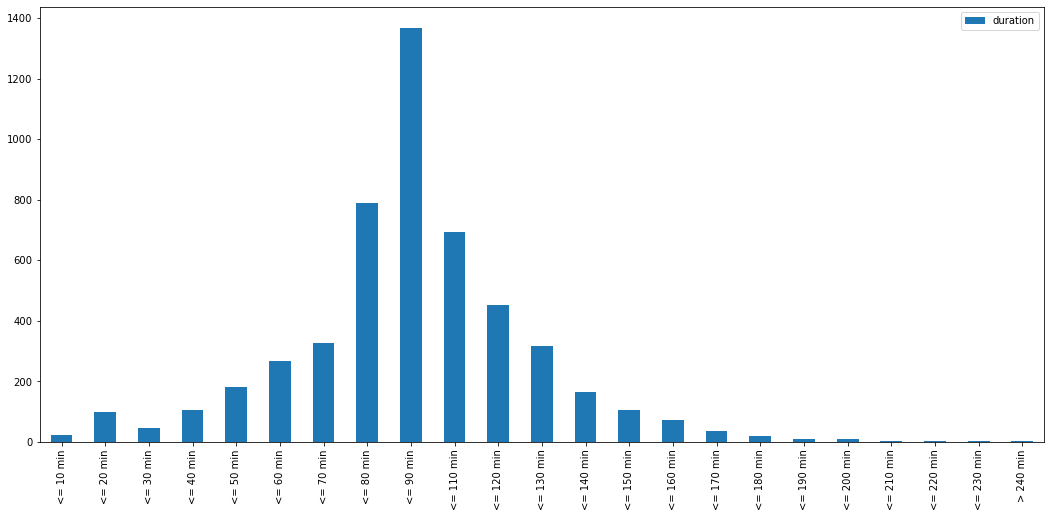

In [25]:
duration_by_minute_df.plot.bar(figsize = (18, 8))

Ta sẽ dùng đồ thị cột để thể hiện phân bố về thời lượng phim theo season. Trong đó:
- Trục tung thể hiện giá trị số lượng các phim có thời lượng theo mùa đó.
- Trục hoành thể hiện các mùa.

<AxesSubplot:>

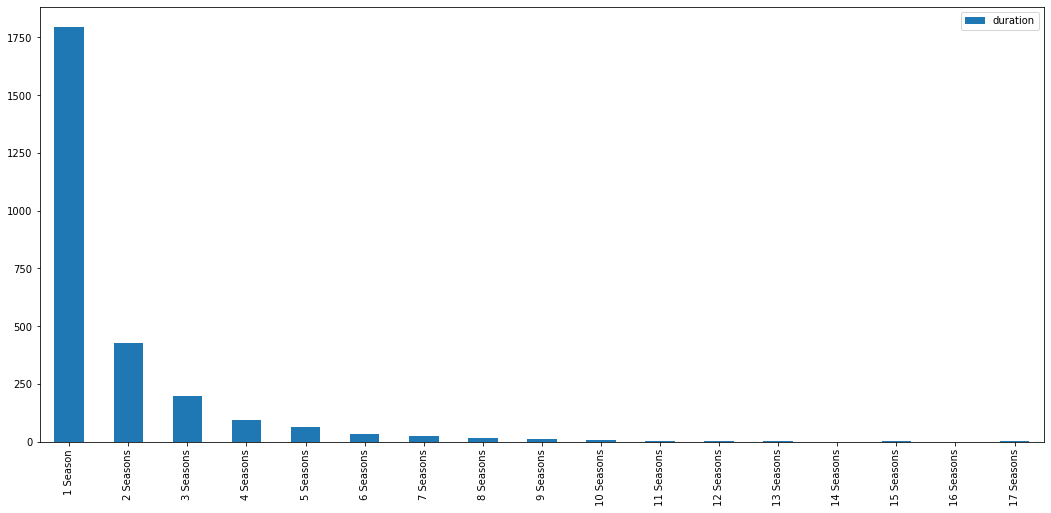

In [26]:
duration_by_season_df.plot.bar(figsize = (18, 8))

Nhận xét:
- Thời lượng của Movie trên Netflix chủ yếu nằm trong khoảng 90 phút và thời lượng của TV Show trên Netflix chủ yếu là 1 mùa.
- Đối với TV Show, càng nhiều mùa thì càng có ít phim hơn.

Khoảng phim dành cho Movie là 90 phút là hợp lý nhất và cũng chính là khung chuẩn cho thời lượng của phim điện ảnh. Theo như nhóm tìm hiểu thì các nhà làm phim luôn coi trọng yếu tố người xem, nếu làm phim quá ngắn thì phim sẽ diễn biến quá nhanh và người xem không hiểu kịp nội dung, nếu làm phim quá dài thì sẽ gây cảm giác chán nản. Có thể thấy các phim có thời lượng hơn 150 phút (2 tiếng 30 phút) trở đi có rất ít, có phim còn có độ dài 4 tiếng (dự đoán là phim tài liệu) sẽ được ít khán giả quan tâm hơn. Ngoài ra 120 phút cũng là mốc dung lượng chuẩn hợp lý thời nay để làm phim, tuy nhiên theo như thống kê thì phim ở mốc 90 phút vẫn chênh lệch nhiều hơn so với phim ở mốc 120 phút.

Về phân bố thời lượng phim theo mùa, các phim có 1 mùa đạt số lượng cao nhất, từ mùa 2 trở đi thì càng giảm dần. Nguyên nhân có lẽ là vì khán giả không có thích thú với bộ phim này nữa, cũng có thể các mùa sau phim không làm tốt như mùa đầu, chất lượng phim giảm dần dẫn tới số lượng người theo dõi cũng giảm theo, nên không có lí do gì mà nhà làm phim tiếp tục níu giữ bộ phim này cả.

## E. NHÌN LẠI QUÁ TRÌNH LÀM ĐỒ ÁN

- Nhìn chung là không có gì quá khó khăn cả, tập dữ liệu cũng đơn giản và dễ hiểu.
- Qua project này thì nhóm có thêm kiến thức về đồ án hơn, đặc biệt là visual và đưa ra đánh giá.

## F. TÀI LIỆU THAM KHẢO

- Nguồn dữ liệu được lấy từ Kaggle: [Link](https://www.kaggle.com/shivamb/netflix-shows)
- Slide và video bài giảng của thầy Trần Trung Kiên.